In [1]:
import numpy as np
import pandas as pd
demo_arr = np.array([[38,23.5,40.2,23],[48,63,44,44],[29,58,2,25],[40,77,31,56]])    
df = pd.DataFrame(demo_arr, columns=['A','B','C','D'])
print(df)

      A     B     C     D
0  38.0  23.5  40.2  23.0
1  48.0  63.0  44.0  44.0
2  29.0  58.0   2.0  25.0
3  40.0  77.0  31.0  56.0


In [13]:
df_sort = df.sort_values(by='D',ascending=False)
print("以列索引D为准进行按值排序是\n",df_sort)

以列索引D为准进行按值排序是
       A     B     C     D
3  40.0  77.0  31.0  56.0
1  48.0  63.0  44.0  44.0
2  29.0  58.0   2.0  25.0
0  38.0  23.5  40.2  23.0


In [14]:
df_avg = df.loc[1].mean()
print("行号索引为1数据的平均值是",df_avg)

行号索引为1数据的平均值是 49.75


In [21]:
df_des = df.describe()
print("数据的统计分析：\n",df_des)
print("count：数量统计，此列共有多少有效值\nmean：均值\nstd：标准差\nmin：最小值\n25%：四分之一分位数\n50%：二分之一分位数\n75%：四分之三分位数\nmax：最大值")

数据的统计分析：
                A          B          C          D
count   4.000000   4.000000   4.000000   4.000000
mean   38.750000  55.375000  29.300000  37.000000
std     7.804913  22.720677  19.000702  15.811388
min    29.000000  23.500000   2.000000  23.000000
25%    35.750000  49.375000  23.750000  24.500000
50%    39.000000  60.500000  35.600000  34.500000
75%    42.000000  66.500000  41.150000  47.000000
max    48.000000  77.000000  44.000000  56.000000
count：数量统计，此列共有多少有效值
mean：均值
std：标准差
min：最小值
25%：四分之一分位数
50%：二分之一分位数
75%：四分之三分位数
max：最大值


<Axes: xlabel='名字', ylabel='数据'>

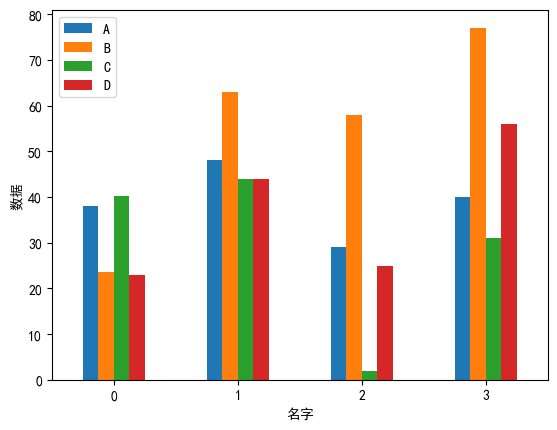

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
df.plot(kind='bar', xlabel='名字', ylabel='数据', rot=0)

<Axes: xlabel='名字', ylabel='数据'>

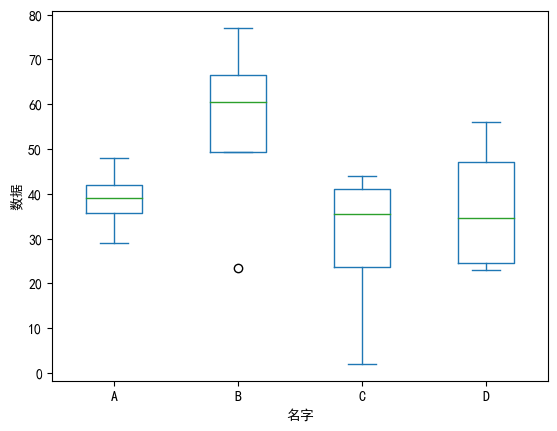

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
df.plot(kind='box', xlabel='名字', ylabel='数据', rot=0)

In [81]:
import pdfplumber
import pandas as pd
with pdfplumber.open("C:\\Users\ROG\Desktop\jupter\超市销售数据.pdf") as pdf:
#      print(pdf.pages[0].extract_text())
    demo_arr=pdf.pages[0].extract_table()
#     print(demo_arr)
    print(demo_arr[2:][0])
#     df = pd.DataFrame(demo_arr[0][1:], columns=demo_arr[0][0])
#     print(df)

#     df = pd.DataFrame(demo_arr[2][1:], columns=demo_arr[1][1:],index=demo_arr[2:6][0])
#     print(df)
    

['食品部', '3310', '2530', '4032', '3572']


In [90]:
import pdfplumber
import pandas as pd
read_path = '超市销售数据.pdf'
pdf=pdfplumber.open("C:\\Users\ROG\Desktop\jupter\超市销售数据.pdf")

result_df = pd.DataFrame()
for page in pdf.pages:
    table = page.extract_table()
    df_detail = pd.DataFrame(table[1:], columns=table[0])
    result_df = pd.concat([df_detail, result_df], ignore_index=True)
print("超市销售表")
print(result_df.to_string(index=False, header=False))


超市销售表
     第1季度 第2季度  第3季度  第4季度
食品部  3310 2530  4032  3572
家电部 12304 8530 10289 11032
日化部  5600 4200  5223  4930
酒水部  8930 7340  8300  8000
生鲜部  3050 2200  2890  3100


In [95]:
import pdfplumber
import pandas as pd
with pdfplumber.open("C:\\Users\ROG\Desktop\jupter\超市销售数据.pdf") as pdf:
    page = pdf.pages[0]
    tables = page.extract_tables()
    data = tables[0]
    data = data[1:]
    df = pd.DataFrame(data)  
    dataz = df
    print(dataz.to_string(index=False, header=False))

     第1季度 第2季度  第3季度  第4季度
食品部  3310 2530  4032  3572
家电部 12304 8530 10289 11032
日化部  5600 4200  5223  4930
酒水部  8930 7340  8300  8000
生鲜部  3050 2200  2890  3100


In [6]:
import pandas as pd
import numpy as np
data = pd.read_excel(r"C:\\Users\ROG\Desktop\jupter\number.xlsx")
data

,Unnamed: 0,value
0,0,18.6
1,1,12.9
2,2,15.4
3,3,14.4
4,4,18.7
...,...,...
995,995,14.2
996,996,10.3
997,997,12.2
998,998,16.1


In [9]:
missing_values = data.isnull().any(axis=1)
rows_missing_values = data[missing_values]
print(rows_missing_values)

     Unnamed: 0  value
116         116    NaN
156         156    NaN
177         177    NaN
203         203    NaN
240         240    NaN
254         254    NaN
284         284    NaN


In [11]:
data = data.interpolate()
missing_values = data.isnull().any(axis=1)
rows_missing_values = data[missing_values]
print(rows_missing_values)

Empty DataFrame
Columns: [Unnamed: 0, value]
Index: []


<Axes: >

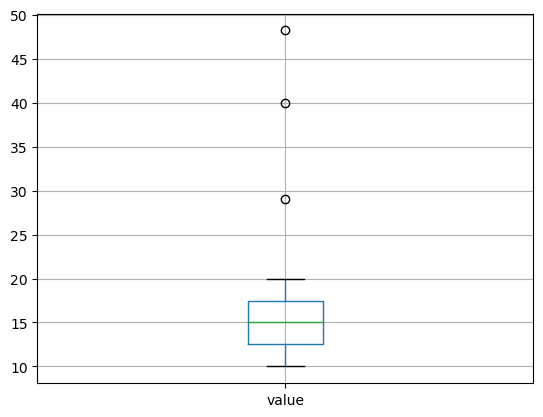

In [2]:
excel_data  = pd.read_excel(r"C:\\Users\ROG\Desktop\jupter\number.xlsx")
excel_data.boxplot(column='value')

In [3]:
def box_outliers(ser):
    new_ser = ser.sort_values()
    if new_ser.count() % 2 == 0:
        Q3 = new_ser[int(len(new_ser) / 2):].median()
        Q1 = new_ser[:int(len(new_ser) / 2)].median()
    elif new_ser.count() % 2 != 0:
        Q3 = new_ser[int((len(new_ser)-1) / 2):].median()
        Q1 = new_ser[:int((len(new_ser)-1) / 2)].median()
    IQR = round(Q3 - Q1, 1) 
    rule = (round(Q3+1.5*IQR, 1) < ser)|(round(Q1-1.5*IQR, 1) > ser)
    index = np.arange(ser.shape[0])[rule]
    outliers = ser.iloc[index]
    return outliers
excel_data = pd.read_excel(r"C:\\Users\ROG\Desktop\jupter\number.xlsx")
box_outliers(excel_data['value'])

47    40.0
60    29.0
74    48.2
Name: value, dtype: float64

In [4]:
excel_data.drop([47, 60,74])

,Unnamed: 0,value
0,0,18.6
1,1,12.9
2,2,15.4
3,3,14.4
4,4,18.7
...,...,...
995,995,14.2
996,996,10.3
997,997,12.2
998,998,16.1
